In [15]:
from matplotlib import pyplot as plt
from sklearn.decomposition import FastICA
import numpy as np
import wave
import IPython

In [16]:
def wav_to_signal(path):
    # turn wave file content into numpy array
    mix_wave = wave.open(path, 'r')
    signal_raw = mix_wave.readframes(-1)
    signal = np.frombuffer(signal_raw, dtype=np.int16)
    return signal, mix_wave.getframerate()

In [17]:
def plot_signal(signal, sr):
    timing = np.linspace(0, len(signal) / sr, num=len(signal))
    plt.figure(figsize=(12, 2))
    plt.title('Recording')
    plt.plot(timing, signal, c="#3ABFE7")
    plt.ylim(-35000, 35000)
    plt.show()

In [18]:
def perform_ICA(X, n_components):
    ica = FastICA(n_components=n_components)
    ica_result = ica.fit_transform(X)
    return ica_result

In [19]:
def combine_signals(*signals):
    return list(zip(*signals))

In [20]:
def extract_result(zip_result):
    return [zip_result[:, i] for i in range(zip_result.shape[1])]

In [21]:
def plot_component(signal):
    plt.figure(figsize=(12,2))
    plt.title('Independent Component')
    plt.plot(signal, c="#df8efd")
    plt.ylim(-0.010, 0.010)
    plt.show()

In [ ]:
IPython.display.Audio("../AudioData/ICA_mix1.wav")

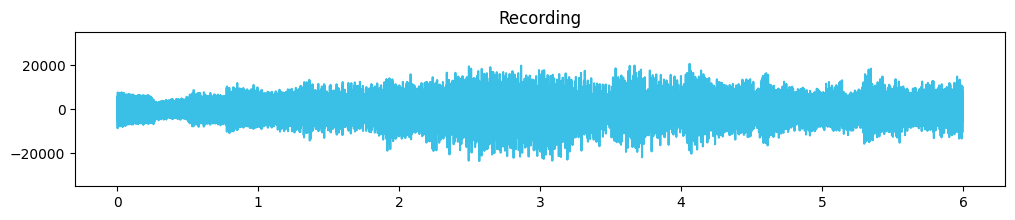

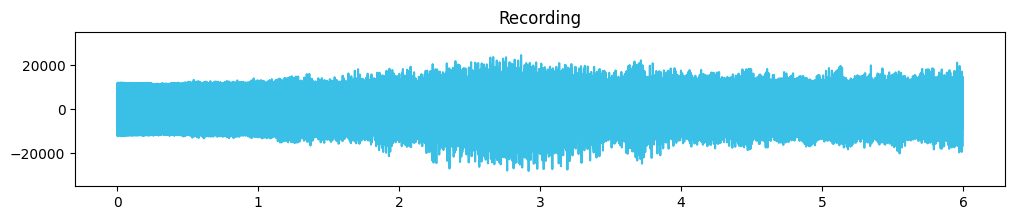

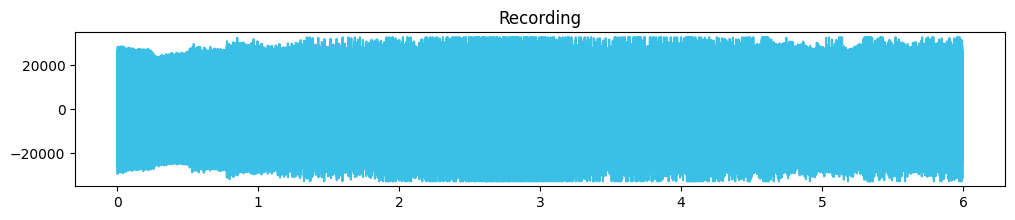

In [24]:
signal1, sr1 = wav_to_signal("../AudioData/ICA_mix1.wav")
plot_signal(signal1, sr1)
signal2, sr2 = wav_to_signal("../AudioData/ICA_mix2.wav")
plot_signal(signal2, sr2)
signal3, sr3 = wav_to_signal("../AudioData/ICA_mix3.wav")
plot_signal(signal3, sr3)


[(879, 157, 879), (1268, 899, 2584), (1460, 1610, 4081), (1756, 2325, 5682), (1943, 3022, 7147), (2216, 3718, 8689), (2407, 4386, 10114), (2668, 5056, 11583), (2866, 5690, 12954), (3106, 6318, 14327)]


/Users/matthewprytula/UCU/year2/LinearAlgebra/AudioSourceSeparation/venv/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


(264515, 3)


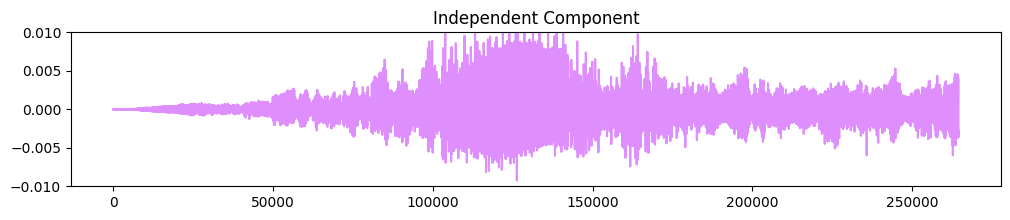

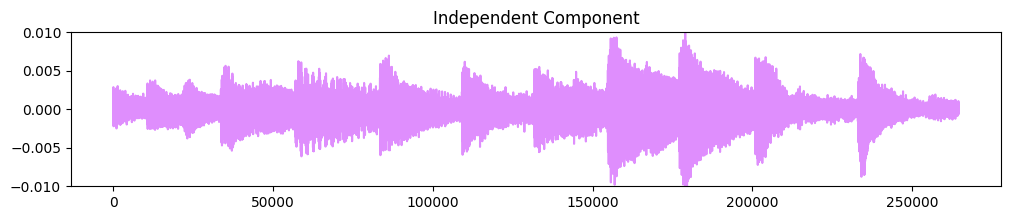

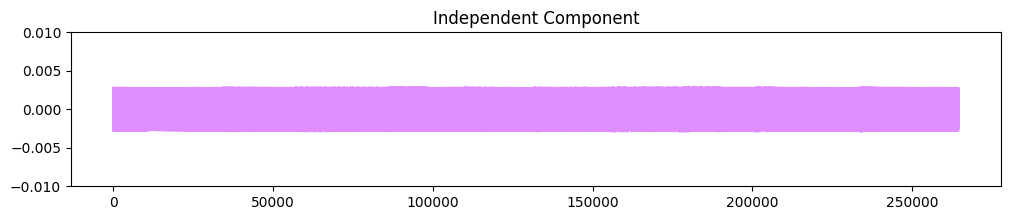

In [25]:
X = combine_signals(signal1, signal2, signal3)
print(X[0:10])
result_signal = perform_ICA(X, 3)
print(result_signal.shape)
result1, result2, result3 = extract_result(result_signal)
plot_component(result1)
plot_component(result2)
plot_component(result3)